In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

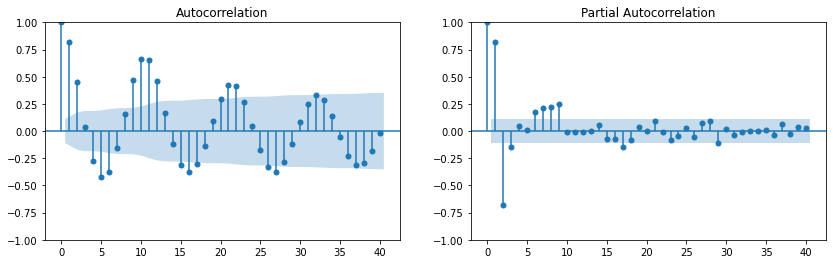

In [63]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
fig, ax = plt.subplots(1,2, figsize=(14,4))
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax= ax[0])
sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, method='ywm', ax=ax[1])
plt.show()


Veo que ocurre con la serie diferenciada estacional

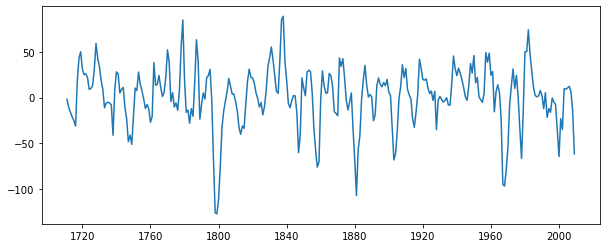

In [58]:
dta_10diff = dta.diff(10).iloc[10:]
fig, ax  = plt.subplots(1,1, figsize=(10,4))
plt.plot(dta_10diff)


In [54]:
from statsmodels.tsa.stattools import adfuller, kpss
print('ADFULLER', adfuller(dta_10diff), '\n')
print('KPSS',kpss(dta_10diff))

ADFULLER (-4.446164695331475, 0.0002457042302737755, 16, 282, {'1%': -3.4537536300652, '5%': -2.8718443180148836, '10%': -2.572260641818822}, 2468.208378091972) 

KPSS (0.04713953018854742, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [64]:
arima = ARIMA(dta.values, order=(2,0,3), seasonal_order=(1,1,1,10))
arima_fit = arima.fit()
arima_fit.summary()

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  309
Model:             ARIMA(2, 0, 3)x(1, 1, [1], 10)   Log Likelihood               -1267.532
Date:                            Fri, 20 May 2022   AIC                           2551.063
Time:                                    21:02:29   BIC                           2580.667
Sample:                                         0   HQIC                          2562.912
                                            - 309                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3521      0.159      8.498      0.000       1.040       1.664
ar.L2         -0.6395      0.101     -6.304      0.000      -0.838      -0.441
ma.L1         -0.1737      0.167     -1.039      0.299      -0.501       0.154
ma.L2          0.0685      0.130      0.529      0.597      -0.185       0.323
ma.L3         -0.0189      0.122     -0.155      0.876      -0.258       0.220
ar.S.L10       0.2791      0.070      4.002      0.000       0.142       0.416
ma.S.L10      -0.9998     15.447     -0.065      0.948     -31.275      29.275
sigma2       254.4552   3920.694      0.065      0.948   -7429.963    7938.874
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                51.16
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.82
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

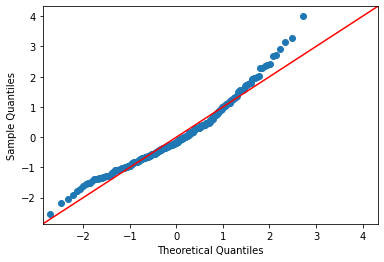

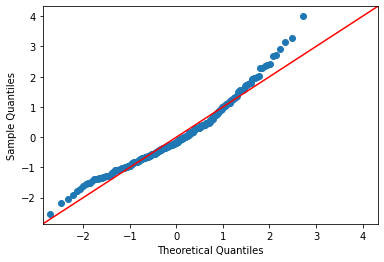

In [66]:
resid = arima_fit.resid
sm.qqplot((resid-resid.mean())/resid.std(), line="45")


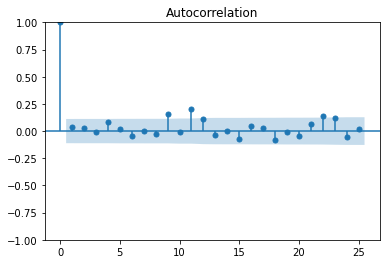

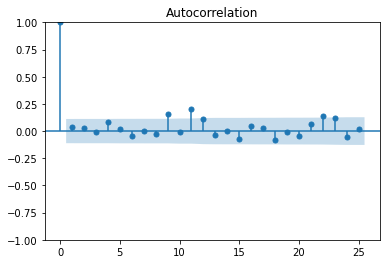

In [68]:
sm.graphics.tsa.plot_acf(resid)

In [73]:
arima = ARIMA(dta.values, order=(2,1,3), seasonal_order=(1,1,1,10))
arima_fit = arima.fit()
arima_fit.summary()

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  309
Model:             ARIMA(2, 1, 3)x(1, 1, [1], 10)   Log Likelihood               -1253.467
Date:                            Sat, 21 May 2022   AIC                           2522.934
Time:                                    00:17:52   BIC                           2552.511
Sample:                                         0   HQIC                          2534.773
                                            - 309                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6128      0.034     47.260      0.000       1.546       1.680
ar.L2         -0.9220      0.030    -30.992      0.000      -0.980      -0.864
ma.L1         -1.4488      0.064    -22.468      0.000      -1.575      -1.322
ma.L2          0.4727      0.103      4.596      0.000       0.271       0.674
ma.L3          0.1190      0.064      1.859      0.063      -0.006       0.244
ar.S.L10       0.0654      0.066      0.986      0.324      -0.065       0.195
ma.S.L10      -0.9921      0.383     -2.587      0.010      -1.744      -0.241
sigma2       237.8944     87.930      2.705      0.007      65.554     410.234
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                29.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.49
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

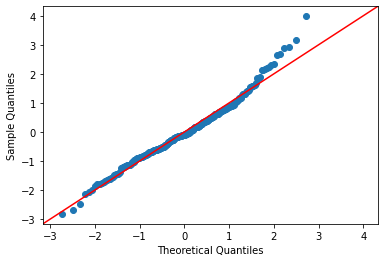

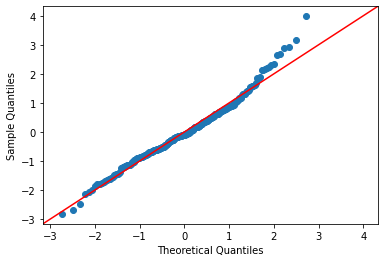

In [74]:
resid = arima_fit.resid
sm.qqplot((resid-resid.mean())/resid.std(), line="45")

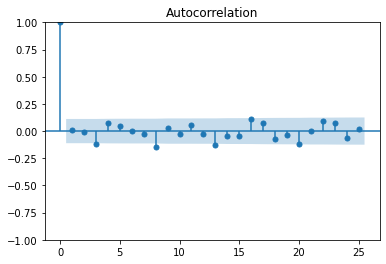

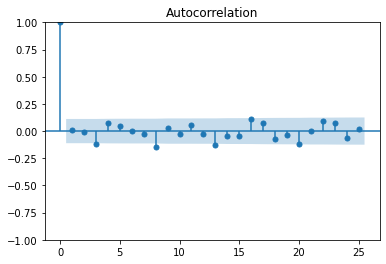

In [75]:
sm.graphics.tsa.plot_acf(resid)